In [16]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [17]:
# Libraries for time series analysis
import os
import sys
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa.stattools as smtools
import scipy.stats as scs

In [18]:
from pandas import datetime
from matplotlib import pyplot
from pandas.core import datetools
import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [19]:
df = pd.read_excel('group_data.xlsx', header=0, parse_dates=[0], index_col=0, squeeze=True)

In [20]:
df.head()

,Short term,Mid-term,Long-term,Discount rate
Date,,,,
2006-08-01,4.925200,6.7639,9.878000,4.50
2006-09-01,4.944802,6.7639,9.575616,4.50
2006-10-01,4.999907,6.7539,9.575616,4.50
2006-11-01,5.000000,6.8080,9.575616,4.50
2006-12-01,5.000000,6.8080,9.369200,4.75


In [21]:
df.corr()

,Short term,Mid-term,Long-term,Discount rate
Short term,1.000000,0.868689,0.781590,0.777361
Mid-term,0.868689,1.000000,0.918201,0.732407
Long-term,0.781590,0.918201,1.000000,0.715991
Discount rate,0.777361,0.732407,0.715991,1.000000


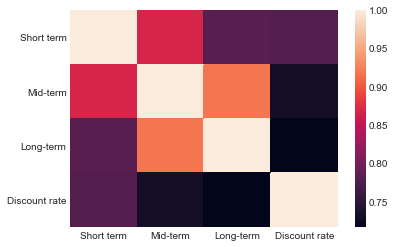

In [22]:
sns.heatmap(df.corr())
plt.show()

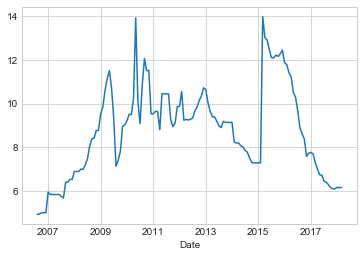

In [23]:
df['Short term'].plot()
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
#testing the stationarity of the data
result = adfuller(df["Short term"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.811461
p-value: 0.056655
Critical Values:
	1%: -3.478
	5%: -2.883
	10%: -2.578


In [26]:
result = adfuller(df["Discount rate"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.661628
p-value: 0.080917
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


In [27]:
#making the data stationary
df['dsh'] = df['Short term'].diff(periods=1)
df['ddisc'] = df['Discount rate'].diff(periods=1)
df.dropna(inplace=True)
df.head()

,Short term,Mid-term,Long-term,Discount rate,dsh,ddisc
Date,,,,,,
2006-09-01,4.944802,6.7639,9.575616,4.50,0.019602,0.00
2006-10-01,4.999907,6.7539,9.575616,4.50,0.055105,0.00
2006-11-01,5.000000,6.8080,9.575616,4.50,0.000093,0.00
2006-12-01,5.000000,6.8080,9.369200,4.75,0.000000,0.25
2007-01-01,5.949600,7.1309,9.369200,4.75,0.949600,0.00


In [28]:
result = adfuller(df["dsh"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.567605
p-value: 0.000000
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


In [29]:
result = adfuller(df["ddisc"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.578125
p-value: 0.000001
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


As we can see Mid-term and Discount rate are I(1) which means we can test cointegration without differencing them

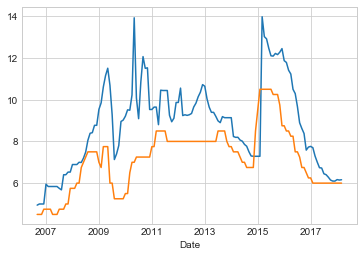

In [30]:
df['Short term'].plot() 
df['Discount rate'].plot() 
plt.show()

In [31]:
smtools.coint(df['Short term'], df['Discount rate'], trend='ct', method='aeg', maxlag=1, autolag='aic', return_results=None)

(-4.243807074379077,
 0.01312472151696027,
 array([-4.44136814, -3.8501214 , -3.54801271]))

In [32]:
X_multi=df['Discount rate']
Y_target=df['Short term']
X_multi=sm.tools.tools.add_constant(X_multi, prepend=True, has_constant='skip')

In [33]:
mod = sm.OLS(Y_target, X_multi)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Short term   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     202.0
Date:                Sat, 12 May 2018   Prob (F-statistic):           9.68e-29
Time:                        11:32:54   Log-Likelihood:                -233.26
No. Observations:                 139   AIC:                             470.5
Df Residuals:                     137   BIC:                             476.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2148      0.545      2.229

# ARDL


In [69]:
data = pd.read_excel('data.xlsx', header=0, parse_dates=[0], index_col=0, squeeze=True)
data.head()

,Short term,Discount rate
Date,,
2006-08-01,4.925200,4.50
2006-08-02,4.944802,4.50
2006-08-03,4.999907,4.50
2006-08-04,5.000000,4.50
2006-08-05,5.000000,4.75


In [70]:
#As we have seen above Mid term and Discount rate become stationary after first difference

In [71]:
ts = pd.period_range(start='8/1/2006', end='3/1/2018', freq='M')
data['Date'] = ts
data.set_index('Date')

,Short term,Discount rate
Date,,
2006-08,4.925200,4.50
2006-09,4.944802,4.50
2006-10,4.999907,4.50
2006-11,5.000000,4.50
2006-12,5.000000,4.75
2007-01,5.949600,4.75
2007-02,5.838400,4.75
2007-03,5.838400,4.75
2007-04,5.838400,4.50


In [72]:
data['dsh'] = data['Short term'].diff(periods=1)
data['ddisc'] = data['Discount rate'].diff(periods=1)
data.dropna(inplace=True)
data.head()

,Short term,Discount rate,Date,dsh,ddisc
Date,,,,,
2006-08-02,4.944802,4.50,2006-09,0.019602,0.00
2006-08-03,4.999907,4.50,2006-10,0.055105,0.00
2006-08-04,5.000000,4.50,2006-11,0.000093,0.00
2006-08-05,5.000000,4.75,2006-12,0.000000,0.25
2006-08-06,5.949600,4.75,2007-01,0.949600,0.00


In [73]:
data['lag1_ddisc'] = data['ddisc'].shift(1)
data['lag2_ddisc'] = data['ddisc'].shift(2)
data['lag1_dsh'] = data['dsh'].shift(1)
data['lag2_dsh'] = data['dsh'].shift(2)

In [74]:
data.head()

,Short term,Discount rate,Date,dsh,ddisc,lag1_ddisc,lag2_ddisc,lag1_dsh,lag2_dsh
Date,,,,,,,,,
2006-08-02,4.944802,4.50,2006-09,0.019602,0.00,NaN,NaN,NaN,NaN
2006-08-03,4.999907,4.50,2006-10,0.055105,0.00,0.00,NaN,0.019602,NaN
2006-08-04,5.000000,4.50,2006-11,0.000093,0.00,0.00,0.0,0.055105,0.019602
2006-08-05,5.000000,4.75,2006-12,0.000000,0.25,0.00,0.0,0.000093,0.055105
2006-08-06,5.949600,4.75,2007-01,0.949600,0.00,0.25,0.0,0.000000,0.000093


In [75]:
data.dropna(inplace=True)

In [76]:
X_multi=data.drop(['Discount rate','Date','ddisc','dsh', 'Short term'], axis=1)
Y_target=data.dsh

In [77]:
X_multi=sm.tools.tools.add_constant(X_multi, prepend=True, has_constant='skip')

                            OLS Regression Results                            
Dep. Variable:                    dsh   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     10.70
Date:                Sat, 12 May 2018   Prob (F-statistic):           1.52e-07
Time:                        11:56:46   Log-Likelihood:                -160.80
No. Observations:                 137   AIC:                             331.6
Df Residuals:                     132   BIC:                             346.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0055      0.068     -0.081      0.9

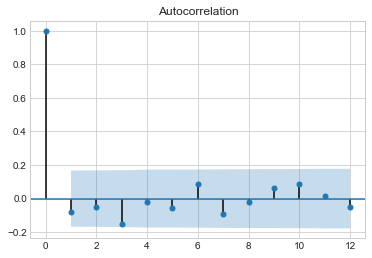

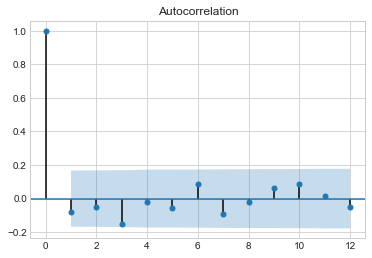

In [80]:
mod = sm.OLS(Y_target, X_multi)
res = mod.fit()
print(res.summary())
model_fit = mod.fit(disp=0)
residuals = DataFrame(model_fit.resid)
plot_acf(residuals,lags=12)

                            OLS Regression Results                            
Dep. Variable:                  ddisc   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     8.719
Date:                Sat, 12 May 2018   Prob (F-statistic):           0.000275
Time:                        11:59:19   Log-Likelihood:                -44.624
No. Observations:                 137   AIC:                             93.25
Df Residuals:                     135   BIC:                             99.09
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lag1_ddisc     0.1893      0.084      2.264      0.0

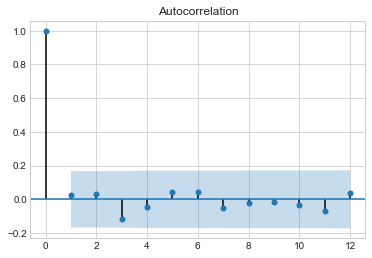

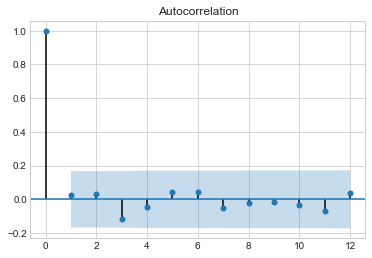

In [85]:
X_multi=data.drop(['Discount rate','Date','ddisc','dsh', 'Short term','lag1_dsh', 'lag2_dsh'], axis=1)
Y_target=data.ddisc
mod = sm.OLS(Y_target, X_multi)
res = mod.fit()
print(res.summary())
model_fit = mod.fit(disp=0)
residuals = DataFrame(model_fit.resid)
plot_acf(residuals,lags=12)

# ARIMA

In [87]:
from pandas import read_csv
series = read_csv('dt1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())

Date
2006-08-01    4.93
2006-09-01    4.94
2006-10-01    5.00
2006-11-01    5.00
2006-12-01    5.00
Name: M, dtype: float64


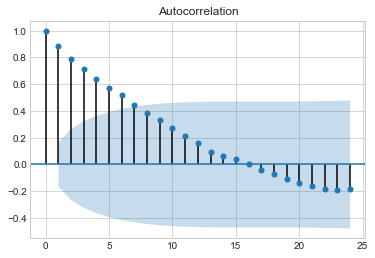

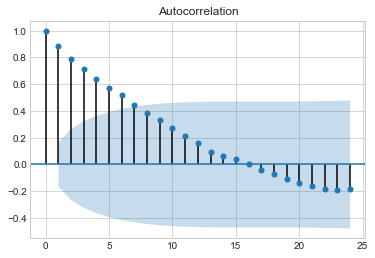

In [88]:
plot_acf(series,lags=24)

In [89]:
diff = series.diff(periods=1)
diff.dropna(inplace=True)

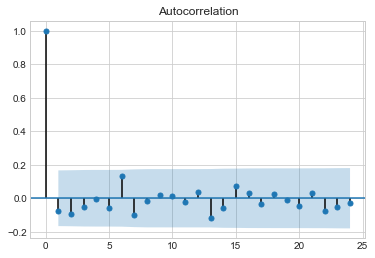

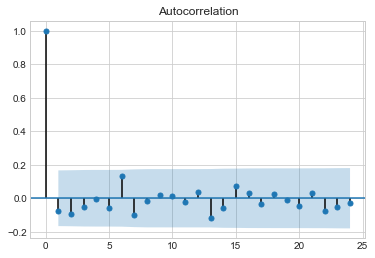

In [90]:
plot_acf(diff,lags=24)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:                    D.M   No. Observations:                  139
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -181.365
Method:                       css-mle   S.D. of innovations              0.892
Date:                Sat, 12 May 2018   AIC                            368.730
Time:                        12:01:20   BIC                            377.533
Sample:                    09-01-2006   HQIC                           372.307
                         - 03-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0088      0.070      0.126      0.900      -0.129       0.147
ar.L1.D.M     -0.0752      0.084     -0.893      0.374      -0.240       0.090
                                    Roots           

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


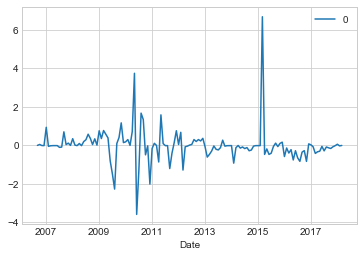

                  0
count  1.390000e+02
mean   6.259608e-07
std    8.953272e-01
min   -3.581211e+00
25%   -2.088045e-01
50%   -1.026543e-02
75%    1.197346e-01
max    6.680487e+00


In [92]:
model = ARIMA(series, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
print(residuals.describe())

In [93]:
model2 = ARIMA(series, order=(2,2,2))
model_fit = model2.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
print(residuals.describe())

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:587: R

LinAlgError: SVD did not converge

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:                    D.M   No. Observations:                  139
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -180.348
Method:                       css-mle   S.D. of innovations              0.885
Date:                Sat, 12 May 2018   AIC                            370.695
Time:                        12:01:30   BIC                            385.367
Sample:                    09-01-2006   HQIC                           376.658
                         - 03-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0088      0.060      0.147      0.883      -0.108       0.126
ar.L1.D.M     -0.0896      0.084     -1.062      0.290      -0.255       0.076
ar.L2.D.M     -0.1049      0.084     -1.250      0.2

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


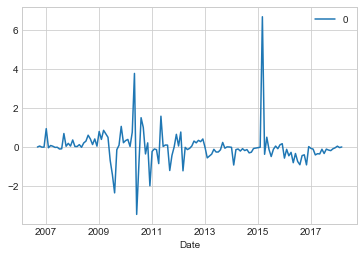

                0
count  139.000000
mean     0.000059
std      0.888692
min     -3.453592
25%     -0.240086
50%     -0.018472
75%      0.149869
max      6.678895


In [94]:
model4 = ARIMA(series, order=(3,1,0))
model_fit = model4.fit(disp=0)
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
print(residuals.describe())

In [95]:
from statsmodels.tsa.arima_model import ARMAResults

In [96]:
results = ARIMA(series, order=(1,1,0)).fit()
results.forecast(steps=6)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


(array([6.16876109, 6.17761537, 6.18646264, 6.19531043, 6.20415819,
        6.21300595]),
 array([0.8921008 , 1.21510022, 1.47154561, 1.68931771, 1.88207055,
        2.05683768]),
 array([[ 4.42027565,  7.91724653],
        [ 3.7960627 ,  8.55916804],
        [ 3.30228624,  9.07063903],
        [ 2.88430856,  9.50631231],
        [ 2.51536769,  9.89294869],
        [ 2.18167817, 10.24433372]]))

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=8.230893, expected=8.200000
predicted=8.237262, expected=8.070000
predicted=8.114669, expected=8.010000
predicted=8.048924, expected=7.860000
predicted=7.902778, expected=7.770000
predicted=7.807433, expected=7.510000
predicted=7.555225, expected=7.300000
predicted=7.339127, expected=7.290000
predicted=7.315999, expected=7.290000
predicted=7.315109, expected=7.290000
predicted=7.314860, expected=7.290000
predicted=7.314616, expected=13.980000
predicted=13.634361, expected=13.020000
predicted=13.205767, expected=12.920000
predicted=13.013980, expected=12.470000
predicted=12.593462, expected=12.110000
predicted=12.218990, expected=12.090000
predicted=12.164755, expected=12.220000
predicted=12.280778, expected=12.160000
predicted=12.238041, expected=12.280000
predicted=12.341016, expected=12.450000
predicted=12.507159, expected=11.870000
predicted=11.994416, expected=11.790000
predicted=11.863806, expected=11.410000
predicted=11.508425, expected=11.230000
predicted=11.306657, ex

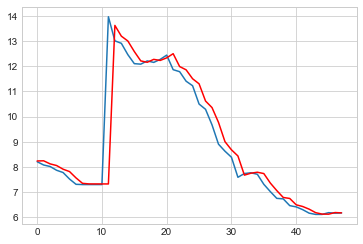

In [97]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()